In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.patches import Patch 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

D:\software\anaconda3\envs\pytorch-env\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\software\anaconda3\envs\pytorch-env\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
D:\software\anaconda3\envs\pytorch-env\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePathOrBuffer', sep=<no_default>, delimiter=None, header='infer', names=<no_default>, index_col=None, usecols=None, squeeze=False, prefix=<no_default>, mangle_dupe_cols=True, dtype: 'DtypeArg | None' = None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: 'str' = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, encoding_errors: 'str | None' = 'strict', dialect=None, error_bad_lines=None, warn_bad_lines=None, on_bad_lines=None, delim_whitespace=False, low_me

In [3]:
users_df = pd.read_csv('users.csv')
events_df = pd.read_csv('events.csv')

In [4]:
print('users_df_features:', users_df.columns)
print('enevnts_df_features:', events_df.columns)

users_df_features: Index(['user_id', 'name', 'email', 'age', 'gender', 'signup_date'], dtype='object')
enevnts_df_features: Index(['user_id', 'event_type', 'timestamp'], dtype='object')


In [5]:
help(users_df.apply)

Help on method apply in module pandas.core.frame:

apply(func: 'AggFuncType', axis: 'Axis' = 0, raw: 'bool' = False, result_type=None, args=(), **kwargs) method of pandas.core.frame.DataFrame instance
    Apply a function along an axis of the DataFrame.
    
    Objects passed to the function are Series objects whose index is
    either the DataFrame's index (``axis=0``) or the DataFrame's columns
    (``axis=1``). By default (``result_type=None``), the final return type
    is inferred from the return type of the applied function. Otherwise,
    it depends on the `result_type` argument.
    
    Parameters
    ----------
    func : function
        Function to apply to each column or row.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Axis along which the function is applied:
    
        * 0 or 'index': apply function to each column.
        * 1 or 'columns': apply function to each row.
    
    raw : bool, default False
        Determines if row or column is passed as 

In [6]:
def unique_list(df, col):
    return list(set(df[col].tolist()))

In [7]:
def timestamp_manage(row):
    tmp = row['timestamp']
    #time data '2025/4/16 19:16' does not match format '%Y/%m/%d %H:%M:%S'
    try:
        timestamp = datetime.datetime.strptime(tmp,"%Y/%m/%d %H:%M:%S")
#         print(timestamp)#2025-04-28 11:39:00
        date_part = timestamp.date()
        #date_str = timestamp.strftime("%Y-%m-%d")
        time_part = timestamp.time()
        #time_str = timestamp.strftime("%H:%M:%S")
    #if there is no second in the time stamp, fill it
    except:
        #if tmp is an int, fill None in the corresponding attribute
        if tmp == 0:
            row['timestamp'] = None
            return row
        #convert str into date
        timestamp = datetime.datetime.strptime(tmp,"%Y/%m/%d %H:%M")
        date_part, time_part = timestamp.date(), timestamp.time()
        time_str = timestamp.strftime("%H:%M")
        time_str = time_str + ':00'
        date_str = timestamp.strftime("%Y-%m-%d")
        timestamp2 = datetime.datetime.strptime(time_str, "%H:%M:%S")
        time_part_2 = timestamp2.time()
    row['date'] = date_part
    row['time'] = time_part_2
    return row

In [8]:
events_df.loc[:, 'date'] = None
events_df.loc[:, 'time'] = None
events_df.head(5)

,user_id,event_type,timestamp,date,time
0,user_001,logout,2025/4/16 19:16,None,None
1,user_001,login,2025/5/6 4:34,None,None
2,user_001,click_ad,2025/4/19 22:00,None,None
3,user_001,login,2025/5/6 22:01,None,None
4,user_001,view_content,2025/4/22 16:21,None,None


In [9]:
events_df.apply(timestamp_manage,axis=1)
events_df.head(5)

,user_id,event_type,timestamp,date,time
0,user_001,logout,2025/4/16 19:16,2025-04-16,19:16:00
1,user_001,login,2025/5/6 4:34,2025-05-06,04:34:00
2,user_001,click_ad,2025/4/19 22:00,2025-04-19,22:00:00
3,user_001,login,2025/5/6 22:01,2025-05-06,22:01:00
4,user_001,view_content,2025/4/22 16:21,2025-04-22,16:21:00


In [10]:
help(datetime.datetime.strptime)

Help on built-in function strptime:

strptime(...) method of builtins.type instance
    string, format -> new datetime parsed from a string (like time.strptime()).



In [11]:
events_df.shape

(1858, 5)

In [12]:
events_df.dropna(inplace=True)
events_df.shape

(1858, 5)

In [13]:
#output the distribution of registered users
gender_series = users_df['gender']
gender_list = gender_series.tolist()
unique_gender = list(set(gender_list))
users_df

,user_id,name,email,age,gender,signup_date
0,user_001,Anthony Miller,vsmith@yahoo.com,56,Female,2025-05-03
1,user_002,Catherine Torres,katie12@lawrence.com,46,Male,2025-03-26
2,user_003,Leslie Smith,morrowshannon@yahoo.com,32,Male,2025-05-01
3,user_004,Jamie Warner,maria50@monroe.com,25,Male,2025-04-22
4,user_005,Laura Wells,shelbyramirez@gutierrez-gould.net,38,Female,2025-03-09
...,...,...,...,...,...,...
95,user_096,Ronald Vaughn,taylor40@yahoo.com,59,Other,2025-04-02
96,user_097,Derek Walker,rogerstevens@gmail.com,56,Male,2025-05-04
97,user_098,Dylan Burns,stacey13@lane.com,58,Female,2025-03-15
98,user_099,April Downs MD,castillobrandon@mccall-sanchez.org,45,Female,2025-04-02


In [15]:
gender_cate = users_df['gender'].value_counts()
gender_cate.keys()
#get the distribution of user gender

Index(['Male', 'Female', 'Other'], dtype='object')

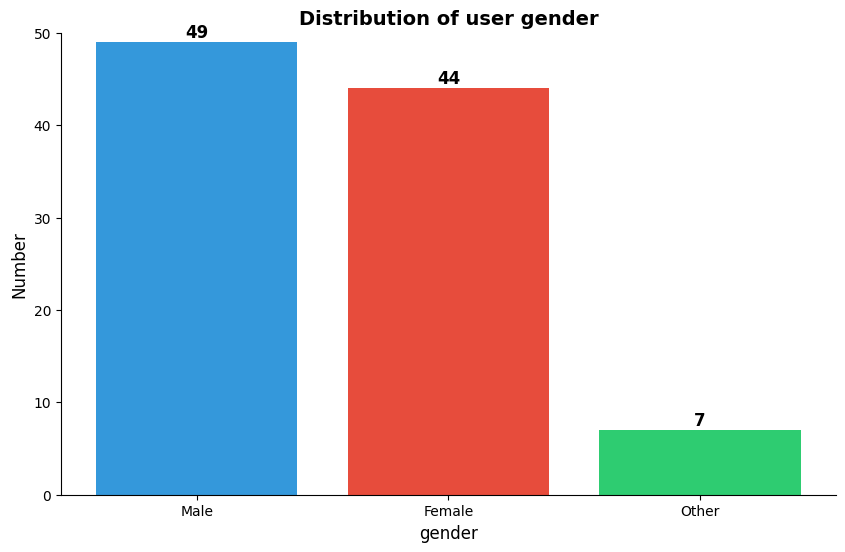

In [16]:
def bar_plotter(size, x, y, label_x, label_y):
    plt.figure(figsize=size)
    bars = plt.bar(
        x = x,
        height=y,
        color=['#3498db', '#e74c3c', '#2ecc71'],
    )
    plt.title('Distribution of user gender', fontsize=14, fontweight='bold')
    plt.xlabel(label_x, fontsize=12)
    plt.ylabel(label_y, fontsize=12)
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.1,
            str(int(height)),
            ha='center',va='bottom',
            fontsize=12,fontweight='bold'
        )
    plt.ylim(0, max(gender_cate.values) + 1)  
    ax = plt.gca()  
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
bar_plotter((10,6), gender_cate.keys(), gender_cate.values, 'gender', 'Number')

In [17]:
#use hist method
unique_age = list(set(users_df['age'].tolist()))
print(unique_age)

[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]


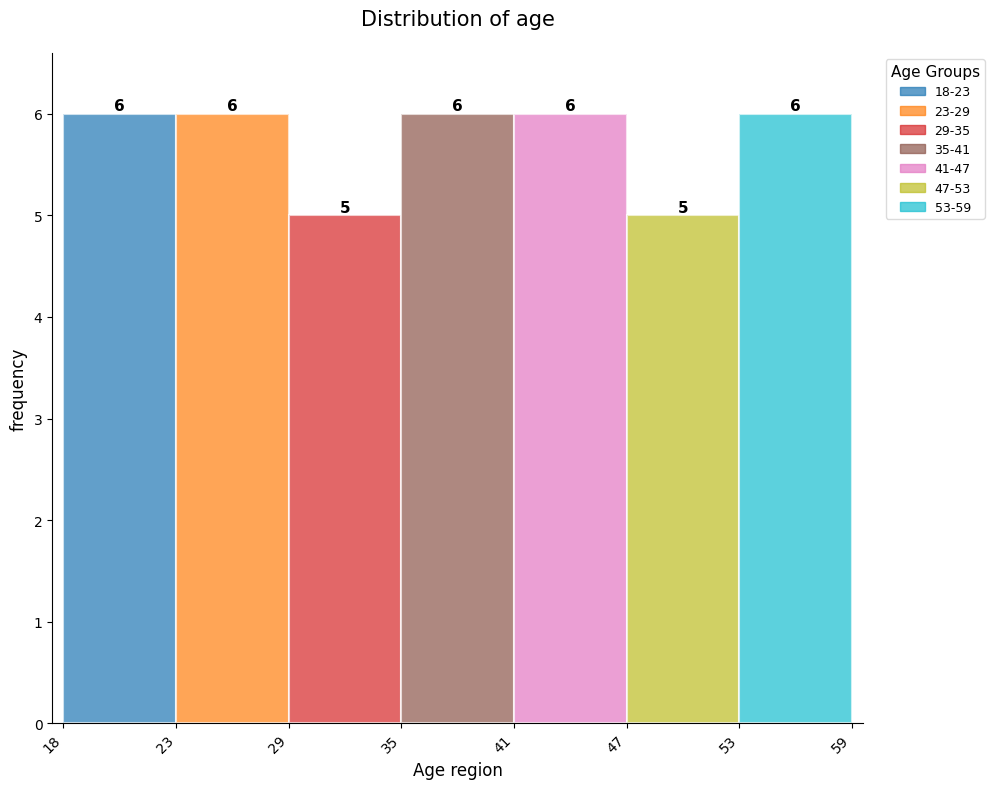

In [18]:
fix, ax = plt.subplots(figsize=(10,8))
n, bins, patches = ax.hist(
    unique_age, bins=7,  
    alpha=0.7,  
    edgecolor='white', 
    linewidth=1.5 
)
colors = cm.tab10(np.linspace(0, 1, len(patches)))
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)
bin_centers = [(int(bins[i] + bins[i+1])/2) for i in range(len(bins)-1)]
bin_labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]
legend_items = [Patch(color=patches[i].get_facecolor(), label=bin_labels[i]) for i in range(len(patches))]
ax.legend(
    handles=legend_items,
    title='Age Groups',
    loc='upper left',  
    bbox_to_anchor=(1.02, 1),  
    fontsize=9,
    title_fontsize=11,
    frameon=True,
    edgecolor='lightgray',
    labelspacing=0.5 
)
#容纳外部图例
plt.subplots_adjust(right=0.7)  
#x轴范围不延伸到图例区域
bin_width = bins[1] - bins[0]
ax.set_xlim(bins[0] - bin_width*0.1, bins[-1] + bin_width*0.1)
ax.set_xticks(bins)  

#旋转避免重叠
ax.set_xticklabels([f'{int(x)}' for x in bins], rotation=45, ha='right', fontsize=10)
for i in range(len(patches)):
    height = n[i]
    if height > 0:
        ax.text(
            patches[i].get_x() + patches[i].get_width()/2,
            height + max(n)*0.001,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=11, fontweight='bold'
        )
ax.set_xlim(bins[0] - (bins[1]-bins[0])*0.1, bins[-1] + (bins[1]-bins[0])*0.1)
ax.set_title('Distribution of age', fontsize=15, pad=20)
ax.set_xlabel('Age region', fontsize=12)
ax.set_ylabel('frequency', fontsize=12)
ax.margins(x=1, y=0.1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [19]:
users_df

,user_id,name,email,age,gender,signup_date
0,user_001,Anthony Miller,vsmith@yahoo.com,56,Female,2025-05-03
1,user_002,Catherine Torres,katie12@lawrence.com,46,Male,2025-03-26
2,user_003,Leslie Smith,morrowshannon@yahoo.com,32,Male,2025-05-01
3,user_004,Jamie Warner,maria50@monroe.com,25,Male,2025-04-22
4,user_005,Laura Wells,shelbyramirez@gutierrez-gould.net,38,Female,2025-03-09
...,...,...,...,...,...,...
95,user_096,Ronald Vaughn,taylor40@yahoo.com,59,Other,2025-04-02
96,user_097,Derek Walker,rogerstevens@gmail.com,56,Male,2025-05-04
97,user_098,Dylan Burns,stacey13@lane.com,58,Female,2025-03-15
98,user_099,April Downs MD,castillobrandon@mccall-sanchez.org,45,Female,2025-04-02


In [20]:
#sort records by signup_date
users_df_grouped = users_df.sort_values(by=['signup_date'],axis=0)
users_df_grouped.head(-1)

,user_id,name,email,age,gender,signup_date
4,user_005,Laura Wells,shelbyramirez@gutierrez-gould.net,38,Female,2025-03-09
65,user_066,Melissa Morton,wmeyers@adams.net,48,Male,2025-03-10
58,user_059,Kyle Randall,nicholas74@williams.com,46,Male,2025-03-12
29,user_030,William Li,mortonkristen@mitchell.com,33,Female,2025-03-12
15,user_016,Sara Jennings,robert19@rice.net,39,Male,2025-03-12
...,...,...,...,...,...,...
53,user_054,Bonnie Roth,mhill@moore-adams.net,21,Male,2025-05-04
96,user_097,Derek Walker,rogerstevens@gmail.com,56,Male,2025-05-04
61,user_062,Virginia Barton,zhill@gmail.com,51,Female,2025-05-04
34,user_035,Andrew Contreras,hoganamanda@mitchell-johnson.org,38,Male,2025-05-04


In [21]:
unique_date = unique_list(users_df_grouped, 'signup_date')
unique_date.sort()

In [22]:
unique_date

['2025-03-09',
 '2025-03-10',
 '2025-03-12',
 '2025-03-14',
 '2025-03-15',
 '2025-03-16',
 '2025-03-17',
 '2025-03-18',
 '2025-03-19',
 '2025-03-20',
 '2025-03-21',
 '2025-03-23',
 '2025-03-24',
 '2025-03-25',
 '2025-03-26',
 '2025-03-27',
 '2025-03-28',
 '2025-04-02',
 '2025-04-03',
 '2025-04-04',
 '2025-04-06',
 '2025-04-07',
 '2025-04-08',
 '2025-04-09',
 '2025-04-10',
 '2025-04-11',
 '2025-04-12',
 '2025-04-13',
 '2025-04-14',
 '2025-04-15',
 '2025-04-16',
 '2025-04-17',
 '2025-04-18',
 '2025-04-19',
 '2025-04-22',
 '2025-04-24',
 '2025-04-26',
 '2025-04-27',
 '2025-04-28',
 '2025-04-30',
 '2025-05-01',
 '2025-05-02',
 '2025-05-03',
 '2025-05-04',
 '2025-05-06',
 '2025-05-07']

In [23]:
daily_counts = users_df.groupby('signup_date').size().reset_index()
daily_counts.columns = ['signup_date','register_count']
daily_counts

,signup_date,register_count
0,2025-03-09,1
1,2025-03-10,1
2,2025-03-12,3
3,2025-03-14,1
4,2025-03-15,2
5,2025-03-16,1
6,2025-03-17,2
7,2025-03-18,2
8,2025-03-19,2
9,2025-03-20,1


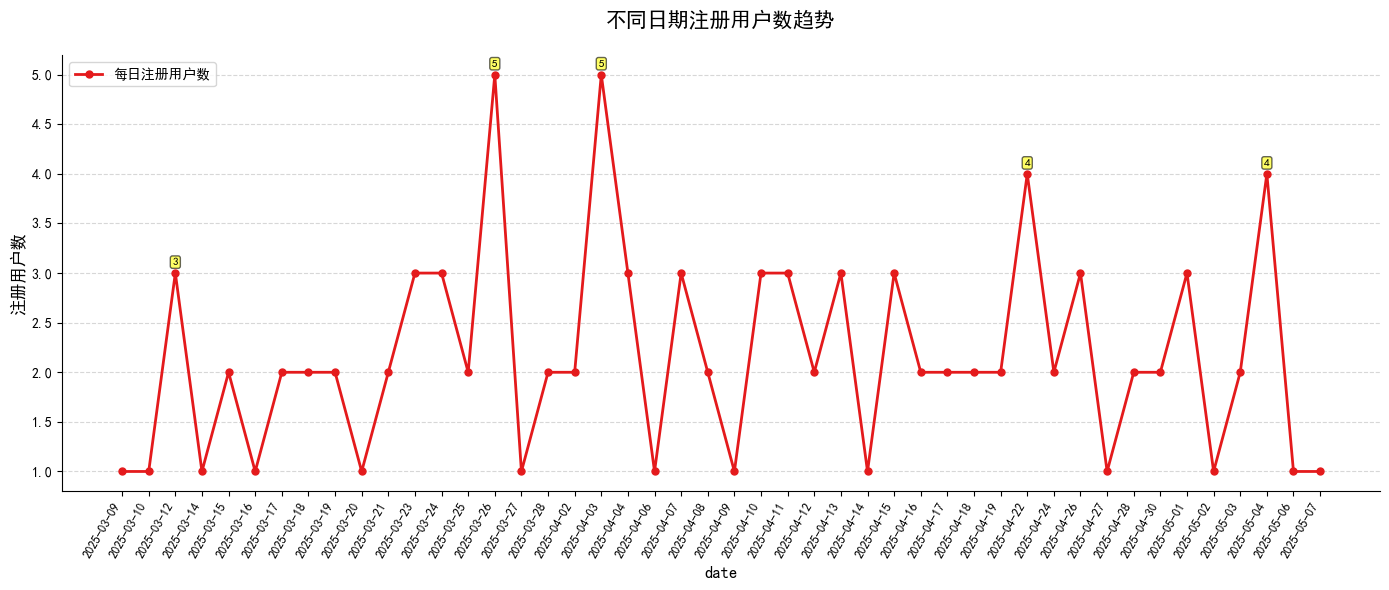

In [24]:
from pylab import mpl
mpl.rcParams["font.sans-serif"] = ["SimHei"]
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(
    daily_counts['signup_date'], 
    daily_counts['register_count'],
    marker='o', markersize=5,  
    linestyle='-', linewidth=2,  
    color='#e41a1c',  
    label='每日注册用户数'
)
ax.set_title('不同日期注册用户数趋势', fontsize=15, pad=20, fontweight='bold')
ax.set_xlabel('date', fontsize=12)
ax.set_ylabel('注册用户数', fontsize=12)

plt.xticks(rotation=60, ha='right', fontsize=9)  
ax.grid(axis='y', linestyle='--', alpha=0.5)

#标注峰值日期
top5_dates = daily_counts.nlargest(5, 'register_count')
for _, row in top5_dates.iterrows():
    if row['register_count'] > 0:  
        ax.annotate(
            f"{row['register_count']}",  # 显示注册数
            xy=(row['signup_date'], row['register_count']),
            xytext=(0, 5),  
            textcoords='offset points',
            ha='center', va='bottom',
            fontsize=8,
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.6)
        )

#去除顶部和右侧边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

In [25]:
import sqlite3
conn = sqlite3.connect('kusi.db')

In [26]:
help(users_df_grouped.to_sql)

Help on method to_sql in module pandas.core.generic:

to_sql(name: 'str', con, schema=None, if_exists: 'str' = 'fail', index: 'bool_t' = True, index_label=None, chunksize=None, dtype: 'DtypeArg | None' = None, method=None) -> 'None' method of pandas.core.frame.DataFrame instance
    Write records stored in a DataFrame to a SQL database.
    
    Databases supported by SQLAlchemy [1]_ are supported. Tables can be
    newly created, appended to, or overwritten.
    
    Parameters
    ----------
    name : str
        Name of SQL table.
    con : sqlalchemy.engine.(Engine or Connection) or sqlite3.Connection
        Using SQLAlchemy makes it possible to use any DB supported by that
        library. Legacy support is provided for sqlite3.Connection objects. The user
        is responsible for engine disposal and connection closure for the SQLAlchemy
        connectable See `here                 <https://docs.sqlalchemy.org/en/13/core/connections.html>`_.
    
    schema : str, optional
  

In [27]:
users_df_grouped.to_sql('user',conn,if_exists='replace',index=False)

In [28]:
events_df.to_sql('events',conn,if_exists='replace',index=False)

In [29]:
events_df_check = pd.read_sql('SELECT * FROM events;',conn)

In [30]:
help(pd.read_sql)

Help on function read_sql in module pandas.io.sql:

read_sql(sql, con, index_col: 'str | Sequence[str] | None' = None, coerce_float: 'bool' = True, params=None, parse_dates=None, columns=None, chunksize: 'int | None' = None) -> 'DataFrame | Iterator[DataFrame]'
    Read SQL query or database table into a DataFrame.
    
    This function is a convenience wrapper around ``read_sql_table`` and
    ``read_sql_query`` (for backward compatibility). It will delegate
    to the specific function depending on the provided input. A SQL query
    will be routed to ``read_sql_query``, while a database table name will
    be routed to ``read_sql_table``. Note that the delegated function might
    have more specific notes about their functionality not listed here.
    
    Parameters
    ----------
    sql : str or SQLAlchemy Selectable (select or text object)
        SQL query to be executed or a table name.
    con : SQLAlchemy connectable, str, or sqlite3 connection
        Using SQLAlchemy make

In [31]:
events_df_check

,user_id,event_type,timestamp,date,time
0,user_001,logout,2025/4/16 19:16,2025-04-16,19:16:00.000000
1,user_001,login,2025/5/6 4:34,2025-05-06,04:34:00.000000
2,user_001,click_ad,2025/4/19 22:00,2025-04-19,22:00:00.000000
3,user_001,login,2025/5/6 22:01,2025-05-06,22:01:00.000000
4,user_001,view_content,2025/4/22 16:21,2025-04-22,16:21:00.000000
...,...,...,...,...,...
1853,user_100,login,2025/4/21 8:59,2025-04-21,08:59:00.000000
1854,user_100,login,2025/5/2 22:24,2025-05-02,22:24:00.000000
1855,user_100,purchase,2025/4/21 7:06,2025-04-21,07:06:00.000000
1856,user_100,login,2025/5/6 18:08,2025-05-06,18:08:00.000000


In [32]:
users_df_check = pd.read_sql('SELECT * FROM user;',conn)

In [33]:
users_df_check

,user_id,name,email,age,gender,signup_date
0,user_005,Laura Wells,shelbyramirez@gutierrez-gould.net,38,Female,2025-03-09
1,user_066,Melissa Morton,wmeyers@adams.net,48,Male,2025-03-10
2,user_059,Kyle Randall,nicholas74@williams.com,46,Male,2025-03-12
3,user_030,William Li,mortonkristen@mitchell.com,33,Female,2025-03-12
4,user_016,Sara Jennings,robert19@rice.net,39,Male,2025-03-12
...,...,...,...,...,...,...
95,user_097,Derek Walker,rogerstevens@gmail.com,56,Male,2025-05-04
96,user_062,Virginia Barton,zhill@gmail.com,51,Female,2025-05-04
97,user_035,Andrew Contreras,hoganamanda@mitchell-johnson.org,38,Male,2025-05-04
98,user_051,Travis Sanchez,chase61@scott-carpenter.com,34,Female,2025-05-06


SELECT
	DATE(signup_date) AS date,
COUNT(*) AS record_count
FROM
	user
GROUP BY
	DATE(signup_date)
ORDER BY
	date;

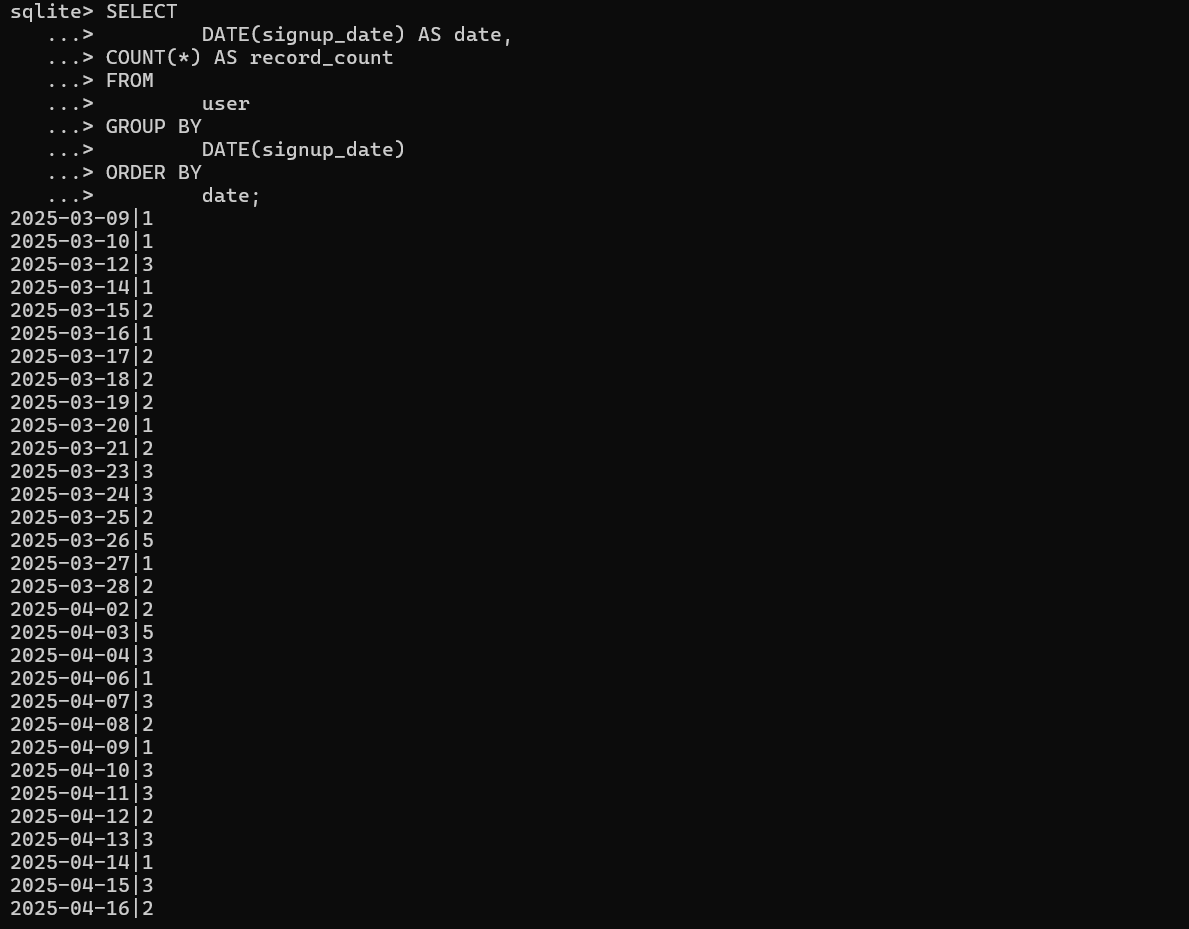

WITH
  
  sorted_events AS (
    SELECT
      user_id, 
      DATE(date) AS event_date  
    FROM events  
    ORDER BY event_date
  ),
  
  latest_date AS (
    SELECT MAX(event_date) AS latest_date FROM sorted_events  
  )
SELECT
  se.event_date AS active_date,
  COUNT(DISTINCT se.user_id) AS daily_active_users  
FROM sorted_events se, latest_date ld  
WHERE

  se.event_date BETWEEN DATE(ld.latest_date, '-7 days') AND ld.latest_date
GROUP BY se.event_date
ORDER BY se.event_date;	

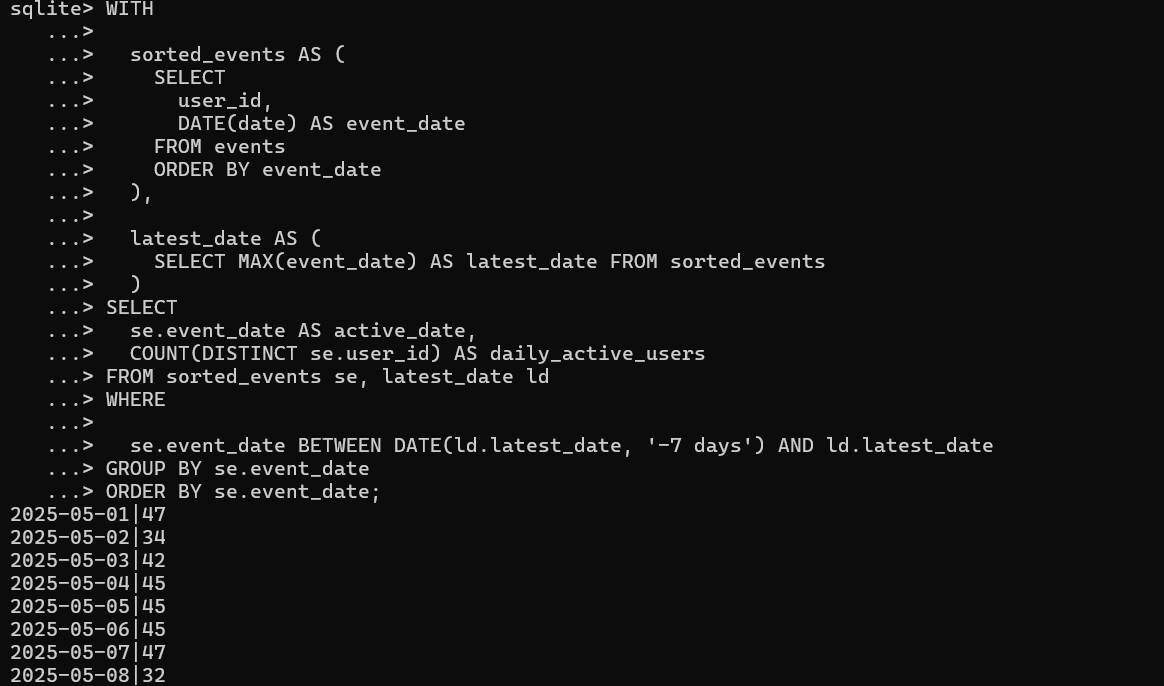

WITH 
  user_event_type_counts AS (
    SELECT 
      user_id,
      event_type,
      COUNT(*) AS type_count  
    FROM events
    GROUP BY user_id, event_type  
  ),
  user_total_events AS (
    SELECT 
      user_id,
      SUM(type_count) AS total_events  
    FROM user_event_type_counts
    GROUP BY user_id
  ),
  ranked_event_types AS (
    SELECT 
      uetc.user_id,
      uetc.event_type,
      uetc.type_count,
      RANK() OVER (
        PARTITION BY uetc.user_id 
        ORDER BY uetc.type_count DESC
      ) AS type_rank
    FROM user_event_type_counts uetc
  )
SELECT 
  ret.user_id,
  ute.total_events,
  ret.event_type AS most_common_event_type
FROM ranked_event_types ret
JOIN user_total_events ute 
  ON ret.user_id = ute.user_id
WHERE ret.type_rank = 1
ORDER BY ret.user_id;

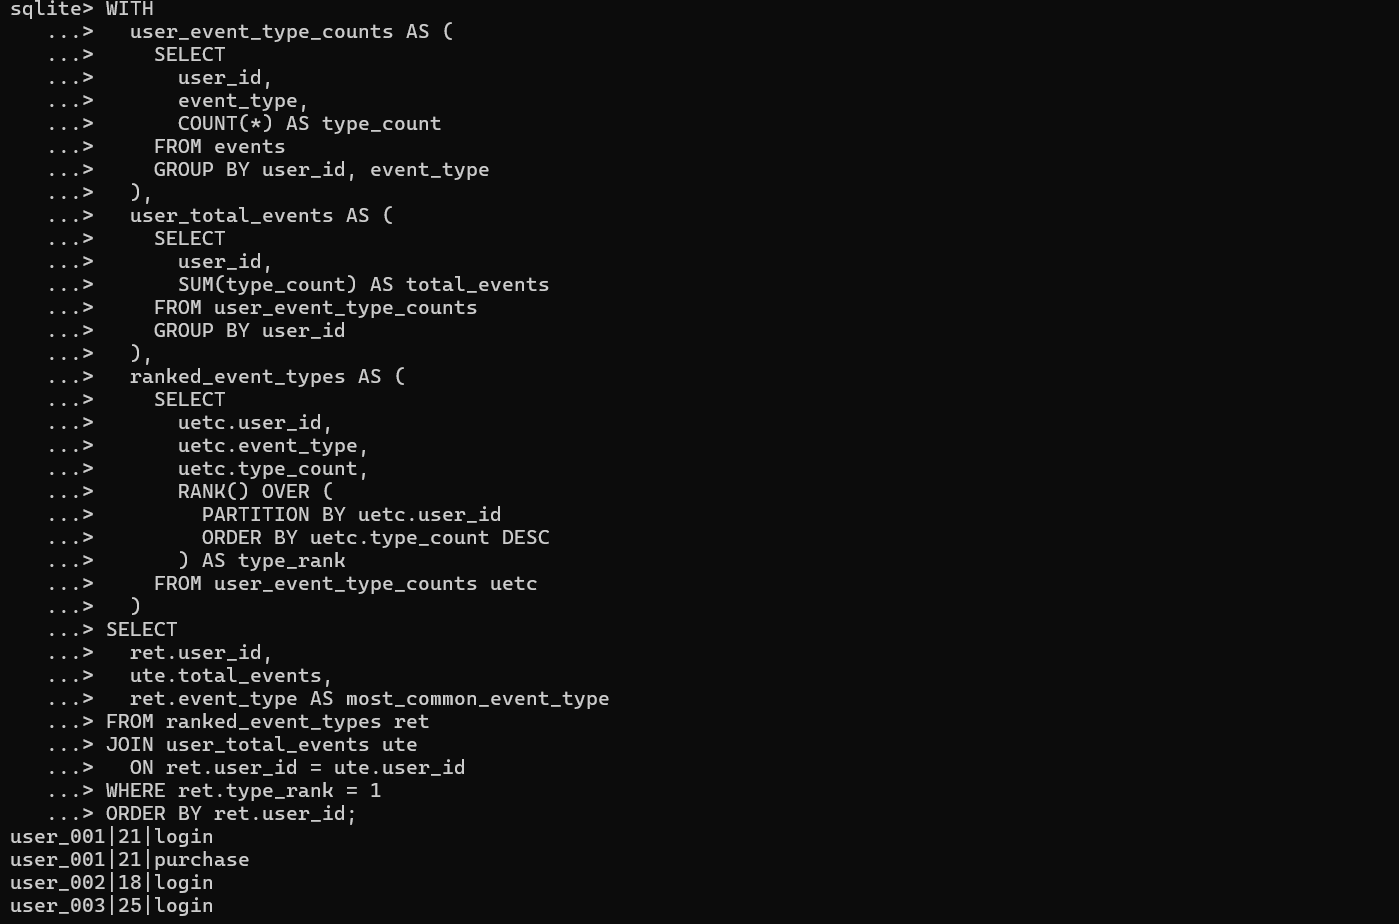

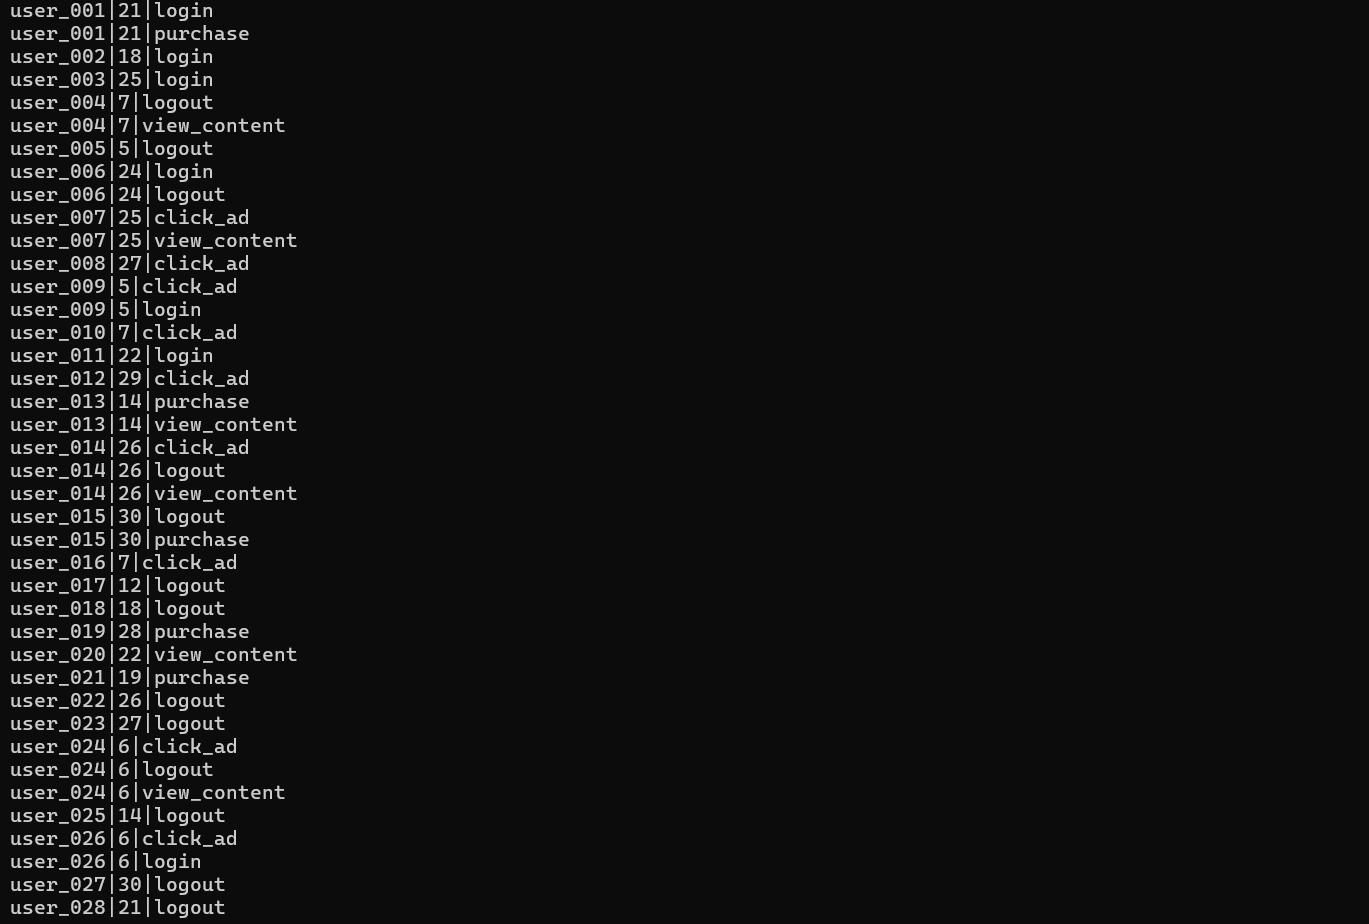

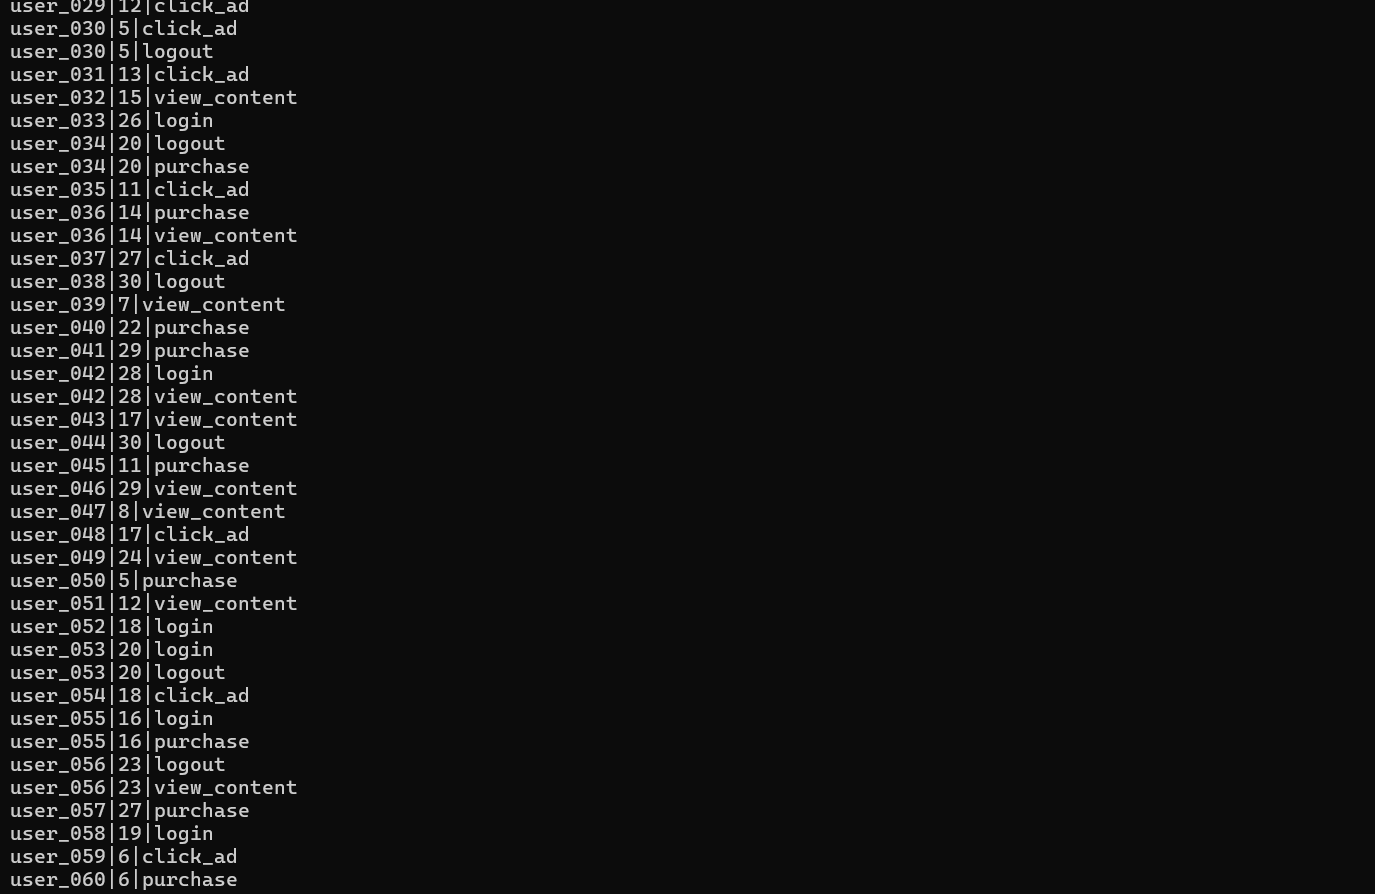

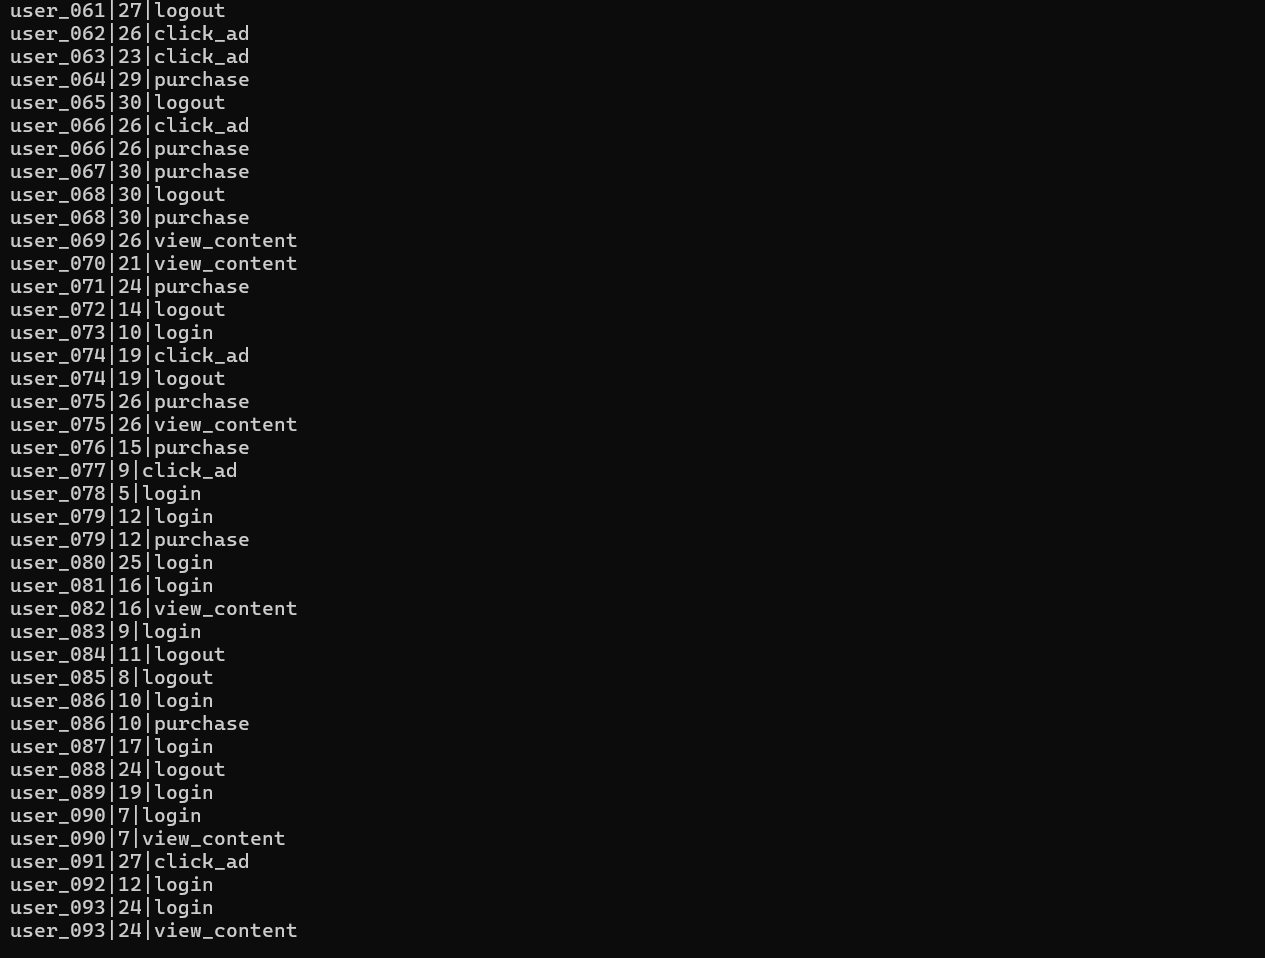

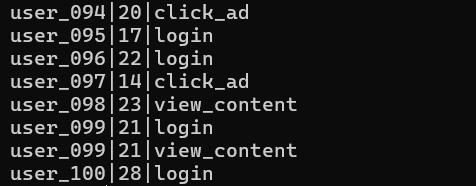

WITH 
  user_event_counts AS (
    SELECT 
      user_id, 
      COUNT(*) AS event_count  
    FROM events 
    GROUP BY user_id
  ),
  user_gender_events AS (
    SELECT 
      u.user_id,
      u.gender,
      COALESCE(uec.event_count, 0) AS event_count
    FROM user u
    LEFT JOIN user_event_counts uec 
      ON u.user_id = uec.user_id
  )
SELECT 
  gender,
  ROUND(AVG(event_count), 2) AS avg_event_count, 
  COUNT(user_id) AS user_total  
FROM user_gender_events
WHERE gender IN ('Male', 'Female','Other')
GROUP BY gender
ORDER BY gender;

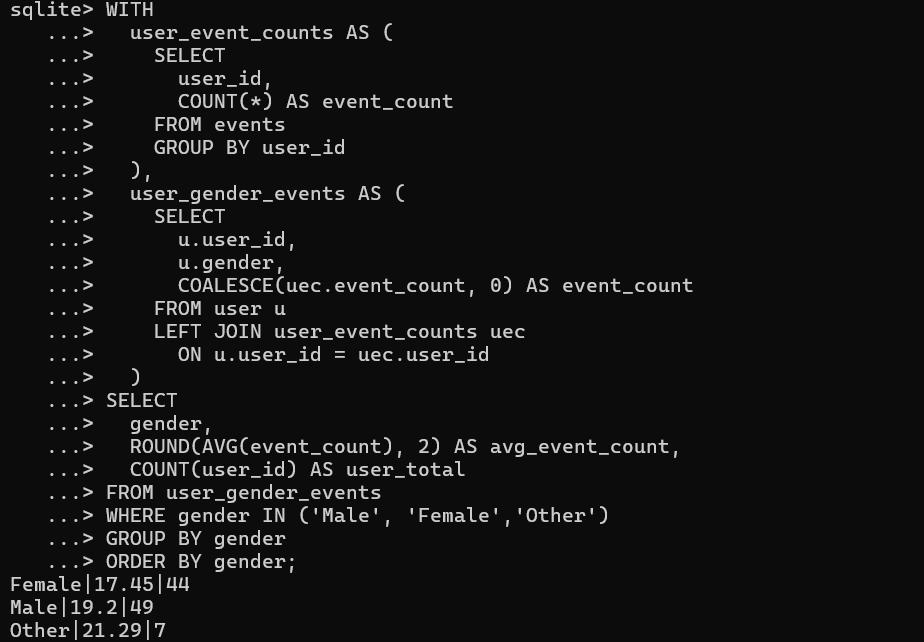

In [34]:
def encoding_feature(row, unique_list,orin_col_name,new_col_name):
    #gender_str = row['gender']
    unique_str = row[orin_col_name]
    row[new_col_name] = unique_list.index(unique_str)
    return unique_list.index(unique_str)

In [35]:
users_df_grouped

,user_id,name,email,age,gender,signup_date
4,user_005,Laura Wells,shelbyramirez@gutierrez-gould.net,38,Female,2025-03-09
65,user_066,Melissa Morton,wmeyers@adams.net,48,Male,2025-03-10
58,user_059,Kyle Randall,nicholas74@williams.com,46,Male,2025-03-12
29,user_030,William Li,mortonkristen@mitchell.com,33,Female,2025-03-12
15,user_016,Sara Jennings,robert19@rice.net,39,Male,2025-03-12
...,...,...,...,...,...,...
96,user_097,Derek Walker,rogerstevens@gmail.com,56,Male,2025-05-04
61,user_062,Virginia Barton,zhill@gmail.com,51,Female,2025-05-04
34,user_035,Andrew Contreras,hoganamanda@mitchell-johnson.org,38,Male,2025-05-04
50,user_051,Travis Sanchez,chase61@scott-carpenter.com,34,Female,2025-05-06


In [36]:
users_df_grouped.loc[:, 'gender_encode'] = 0
users_df_grouped['gender_encode'] = users_df_grouped.apply(lambda row: encoding_feature(row, unique_gender, 'gender', 'gender_kind'), axis=1)

In [37]:
users_df_grouped[users_df_grouped['gender_encode']==2]

,user_id,name,email,age,gender,signup_date,gender_encode
28,user_029,Dwayne Phillips,margaretwright@taylor.com,45,Other,2025-03-17,2
81,user_082,Heather Brown,curtiswendy@yahoo.com,42,Other,2025-03-21,2
10,user_011,Scott Moore,chris41@lewis.com,41,Other,2025-03-24,2
95,user_096,Ronald Vaughn,taylor40@yahoo.com,59,Other,2025-04-02,2
66,user_067,Mr. David Charles,jenniferwagner@yahoo.com,32,Other,2025-04-19,2
42,user_043,Teresa Garcia,christinelittle@hotmail.com,43,Other,2025-04-24,2
64,user_065,Melissa Ryan,avilamatthew@yahoo.com,31,Other,2025-04-30,2


In [38]:
cur_datetime = datetime.datetime.now()
cur_date = cur_datetime.date()
cur_date

datetime.date(2025, 10, 19)

In [39]:
def get_registerd_day(row, cur_date):
    date_minus = cur_date - datetime.datetime.strptime(row['signup_date'],"%Y-%m-%d").date()
    days = date_minus.days
    row['registered_days'] = days
    return days

In [40]:
users_df_grouped.loc[:, 'registered_days'] = 0
users_df_grouped['registered_days'] = users_df_grouped.apply(lambda row: get_registerd_day(row, cur_date=cur_date), axis=1)
users_df_grouped

,user_id,name,email,age,gender,signup_date,gender_encode,registered_days
4,user_005,Laura Wells,shelbyramirez@gutierrez-gould.net,38,Female,2025-03-09,1,224
65,user_066,Melissa Morton,wmeyers@adams.net,48,Male,2025-03-10,0,223
58,user_059,Kyle Randall,nicholas74@williams.com,46,Male,2025-03-12,0,221
29,user_030,William Li,mortonkristen@mitchell.com,33,Female,2025-03-12,1,221
15,user_016,Sara Jennings,robert19@rice.net,39,Male,2025-03-12,0,221
...,...,...,...,...,...,...,...,...
96,user_097,Derek Walker,rogerstevens@gmail.com,56,Male,2025-05-04,0,168
61,user_062,Virginia Barton,zhill@gmail.com,51,Female,2025-05-04,1,168
34,user_035,Andrew Contreras,hoganamanda@mitchell-johnson.org,38,Male,2025-05-04,0,168
50,user_051,Travis Sanchez,chase61@scott-carpenter.com,34,Female,2025-05-06,1,166


In [41]:
unique_event = unique_list(events_df, 'event_type')
unique_event

['view_content', 'login', 'purchase', 'click_ad', 'logout']

In [42]:
events_df['event_encode'] = events_df.apply(lambda row: encoding_feature(row, unique_event, 'event_type', 'event_encode'), axis=1)

In [43]:
events_df

,user_id,event_type,timestamp,date,time,event_encode
0,user_001,logout,2025/4/16 19:16,2025-04-16,19:16:00,4
1,user_001,login,2025/5/6 4:34,2025-05-06,04:34:00,1
2,user_001,click_ad,2025/4/19 22:00,2025-04-19,22:00:00,3
3,user_001,login,2025/5/6 22:01,2025-05-06,22:01:00,1
4,user_001,view_content,2025/4/22 16:21,2025-04-22,16:21:00,0
...,...,...,...,...,...,...
1853,user_100,login,2025/4/21 8:59,2025-04-21,08:59:00,1
1854,user_100,login,2025/5/2 22:24,2025-05-02,22:24:00,1
1855,user_100,purchase,2025/4/21 7:06,2025-04-21,07:06:00,2
1856,user_100,login,2025/5/6 18:08,2025-05-06,18:08:00,1


In [45]:
event_user = events_df.groupby(['user_id'])

In [46]:
event_user.head(5)

,user_id,event_type,timestamp,date,time,event_encode
0,user_001,logout,2025/4/16 19:16,2025-04-16,19:16:00,4
1,user_001,login,2025/5/6 4:34,2025-05-06,04:34:00,1
2,user_001,click_ad,2025/4/19 22:00,2025-04-19,22:00:00,3
3,user_001,login,2025/5/6 22:01,2025-05-06,22:01:00,1
4,user_001,view_content,2025/4/22 16:21,2025-04-22,16:21:00,0
...,...,...,...,...,...,...
1830,user_100,purchase,2025/4/30 16:16,2025-04-30,16:16:00,2
1831,user_100,login,2025/4/18 15:32,2025-04-18,15:32:00,1
1832,user_100,view_content,2025/4/18 10:26,2025-04-18,10:26:00,0
1833,user_100,login,2025/4/12 10:46,2025-04-12,10:46:00,1


In [48]:
#求出各个用户的各类事件数
result = event_user['event_encode'].apply(pd.Series.value_counts).reset_index()
result.columns = ['user_id', 'event_type', 'count']
result

,user_id,event_type,count
0,user_001,1,5
1,user_001,2,5
2,user_001,3,4
3,user_001,0,4
4,user_001,4,3
...,...,...,...
465,user_100,1,12
466,user_100,0,7
467,user_100,2,4
468,user_100,3,3


In [49]:
#.size():Return Number of rows in each group as a Series if as_index is True
counts_long = events_df.groupby(['user_id','event_type']).size().reset_index()
result_wide = counts_long.pivot(index='user_id', columns='event_type').fillna(0).astype('int').reset_index(drop=True)
result_wide.columns = ['click_ad', 'login', 'logout', 'purchase','view_content']
result_wide

,click_ad,login,logout,purchase,view_content
0,4,5,3,5,4
1,4,5,1,4,4
2,3,8,6,4,4
3,1,1,2,1,2
4,1,0,2,1,1
...,...,...,...,...,...
95,2,6,5,5,4
96,6,2,0,3,3
97,5,5,2,5,6
98,4,5,4,3,5


In [50]:
result_wide['event_sum'] = result_wide.sum(axis=1)
def get_ratio(row, unique_event):
    for elem in list(unique_event):
        print('row[elem]:',float(row[elem]))
        print('row[event_sum]',float(row['event_sum']))
        row[elem] = float(row[elem]) / float(row['event_sum'])
        print(row[elem])
    return row
result_wide

,click_ad,login,logout,purchase,view_content,event_sum
0,4,5,3,5,4,21
1,4,5,1,4,4,18
2,3,8,6,4,4,25
3,1,1,2,1,2,7
4,1,0,2,1,1,5
...,...,...,...,...,...,...
95,2,6,5,5,4,22
96,6,2,0,3,3,14
97,5,5,2,5,6,23
98,4,5,4,3,5,21


In [51]:
help(events_df.groupby(['user_id','event_type']).size)

Help on method size in module pandas.core.groupby.groupby:

size() -> 'FrameOrSeriesUnion' method of pandas.core.groupby.generic.DataFrameGroupBy instance
    Compute group sizes.
    
    Returns
    -------
    DataFrame or Series
        Number of rows in each group as a Series if as_index is True
        or a DataFrame if as_index is False.
    
    See Also
    --------
    Series.groupby : Apply a function groupby to a Series.
    DataFrame.groupby : Apply a function groupby
        to each row or column of a DataFrame.



In [52]:
help(counts_long.pivot(index='user_id', columns='event_type').fillna(0).astype('int').reset_index)

Help on method reset_index in module pandas.core.frame:

reset_index(level: 'Hashable | Sequence[Hashable] | None' = None, drop: 'bool' = False, inplace: 'bool' = False, col_level: 'Hashable' = 0, col_fill: 'Hashable' = '') -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Reset the index, or a level of it.
    
    Reset the index of the DataFrame, and use the default one instead.
    If the DataFrame has a MultiIndex, this method can remove one or more
    levels.
    
    Parameters
    ----------
    level : int, str, tuple, or list, default None
        Only remove the given levels from the index. Removes all levels by
        default.
    drop : bool, default False
        Do not try to insert index into dataframe columns. This resets
        the index to the default integer index.
    inplace : bool, default False
        Modify the DataFrame in place (do not create a new object).
    col_level : int or str, default 0
        If the columns have multiple l

In [53]:
#传进去前先转浮点
result_wide[unique_event] = result_wide[unique_event].astype(float)
result_wide = result_wide.apply(get_ratio, args=(tuple(unique_event),),axis=1)

row[elem]: 4.0
row[event_sum] 21.0
0.19047619047619047
row[elem]: 5.0
row[event_sum] 21.0
0.23809523809523808
row[elem]: 5.0
row[event_sum] 21.0
0.23809523809523808
row[elem]: 4.0
row[event_sum] 21.0
0.19047619047619047
row[elem]: 3.0
row[event_sum] 21.0
0.14285714285714285
row[elem]: 4.0
row[event_sum] 18.0
0.2222222222222222
row[elem]: 5.0
row[event_sum] 18.0
0.2777777777777778
row[elem]: 4.0
row[event_sum] 18.0
0.2222222222222222
row[elem]: 4.0
row[event_sum] 18.0
0.2222222222222222
row[elem]: 1.0
row[event_sum] 18.0
0.05555555555555555
row[elem]: 4.0
row[event_sum] 25.0
0.16
row[elem]: 8.0
row[event_sum] 25.0
0.32
row[elem]: 4.0
row[event_sum] 25.0
0.16
row[elem]: 3.0
row[event_sum] 25.0
0.12
row[elem]: 6.0
row[event_sum] 25.0
0.24
row[elem]: 2.0
row[event_sum] 7.0
0.2857142857142857
row[elem]: 1.0
row[event_sum] 7.0
0.14285714285714285
row[elem]: 1.0
row[event_sum] 7.0
0.14285714285714285
row[elem]: 1.0
row[event_sum] 7.0
0.14285714285714285
row[elem]: 2.0
row[event_sum] 7.0
0.285

In [54]:
result_wide.index.name = 'user_id'

In [55]:
result_wide

,click_ad,login,logout,purchase,view_content,event_sum
user_id,,,,,,
0,0.190476,0.238095,0.142857,0.238095,0.190476,21.0
1,0.222222,0.277778,0.055556,0.222222,0.222222,18.0
2,0.120000,0.320000,0.240000,0.160000,0.160000,25.0
3,0.142857,0.142857,0.285714,0.142857,0.285714,7.0
4,0.200000,0.000000,0.400000,0.200000,0.200000,5.0
...,...,...,...,...,...,...
95,0.090909,0.272727,0.227273,0.227273,0.181818,22.0
96,0.428571,0.142857,0.000000,0.214286,0.214286,14.0
97,0.217391,0.217391,0.086957,0.217391,0.260870,23.0


In [56]:
#重置索引列，将原有的索引列作为新列
result_wide = result_wide.reset_index()
result_wide['user_id'] = 'user_' + (result_wide['user_id'] + 1).astype(str).str.zfill(3)

In [57]:
result_wide

,user_id,click_ad,login,logout,purchase,view_content,event_sum
0,user_001,0.190476,0.238095,0.142857,0.238095,0.190476,21.0
1,user_002,0.222222,0.277778,0.055556,0.222222,0.222222,18.0
2,user_003,0.120000,0.320000,0.240000,0.160000,0.160000,25.0
3,user_004,0.142857,0.142857,0.285714,0.142857,0.285714,7.0
4,user_005,0.200000,0.000000,0.400000,0.200000,0.200000,5.0
...,...,...,...,...,...,...,...
95,user_096,0.090909,0.272727,0.227273,0.227273,0.181818,22.0
96,user_097,0.428571,0.142857,0.000000,0.214286,0.214286,14.0
97,user_098,0.217391,0.217391,0.086957,0.217391,0.260870,23.0
98,user_099,0.190476,0.238095,0.190476,0.142857,0.238095,21.0


In [58]:
result_wide['user_id'] = result_wide['user_id'].astype(str)
#进行左连接
df_merge = users_df_grouped.merge(right=result_wide, how='left', on='user_id')
#根据user_id这一列对dataframe记录重排序
df_merge.sort_values(by='user_id').reset_index(drop=True)

,user_id,name,email,age,gender,signup_date,gender_encode,registered_days,click_ad,login,logout,purchase,view_content,event_sum
0,user_001,Anthony Miller,vsmith@yahoo.com,56,Female,2025-05-03,1,169,0.190476,0.238095,0.142857,0.238095,0.190476,21.0
1,user_002,Catherine Torres,katie12@lawrence.com,46,Male,2025-03-26,0,207,0.222222,0.277778,0.055556,0.222222,0.222222,18.0
2,user_003,Leslie Smith,morrowshannon@yahoo.com,32,Male,2025-05-01,0,171,0.120000,0.320000,0.240000,0.160000,0.160000,25.0
3,user_004,Jamie Warner,maria50@monroe.com,25,Male,2025-04-22,0,180,0.142857,0.142857,0.285714,0.142857,0.285714,7.0
4,user_005,Laura Wells,shelbyramirez@gutierrez-gould.net,38,Female,2025-03-09,1,224,0.200000,0.000000,0.400000,0.200000,0.200000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,user_096,Ronald Vaughn,taylor40@yahoo.com,59,Other,2025-04-02,2,200,0.090909,0.272727,0.227273,0.227273,0.181818,22.0
96,user_097,Derek Walker,rogerstevens@gmail.com,56,Male,2025-05-04,0,168,0.428571,0.142857,0.000000,0.214286,0.214286,14.0
97,user_098,Dylan Burns,stacey13@lane.com,58,Female,2025-03-15,1,218,0.217391,0.217391,0.086957,0.217391,0.260870,23.0
98,user_099,April Downs MD,castillobrandon@mccall-sanchez.org,45,Female,2025-04-02,1,200,0.190476,0.238095,0.190476,0.142857,0.238095,21.0


In [59]:
numerical_df = df_merge.select_dtypes(include=['number'])
numerical_df

,age,gender_encode,registered_days,click_ad,login,logout,purchase,view_content,event_sum
0,38,1,224,0.200000,0.000000,0.400000,0.200000,0.200000,5.0
1,48,0,223,0.269231,0.153846,0.153846,0.269231,0.153846,26.0
2,46,0,221,0.500000,0.333333,0.000000,0.166667,0.000000,6.0
3,33,1,221,0.400000,0.200000,0.400000,0.000000,0.000000,5.0
4,39,0,221,0.428571,0.142857,0.142857,0.000000,0.285714,7.0
...,...,...,...,...,...,...,...,...,...
95,56,0,168,0.428571,0.142857,0.000000,0.214286,0.214286,14.0
96,51,1,168,0.307692,0.153846,0.076923,0.269231,0.192308,26.0
97,38,0,168,0.454545,0.181818,0.000000,0.090909,0.272727,11.0
98,34,1,166,0.083333,0.250000,0.250000,0.083333,0.333333,12.0


In [60]:
#由于缺少活跃用户标签，先尝试降维＋聚类方案
pca = PCA(n_components=3)
numerical_np = numerical_df.to_numpy()
pca.fit(numerical_np)
print(pca.explained_variance_ratio_)

[0.55964408 0.31706019 0.12239527]


In [61]:
numerical_df['daily_activity'] = numerical_df['event_sum'] / numerical_df['registered_days']
numerical_df

C:\Users\zx\AppData\Local\Temp\ipykernel_39300\2560611144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df['daily_activity'] = numerical_df['event_sum'] / numerical_df['registered_days']


,age,gender_encode,registered_days,click_ad,login,logout,purchase,view_content,event_sum,daily_activity
0,38,1,224,0.200000,0.000000,0.400000,0.200000,0.200000,5.0,0.022321
1,48,0,223,0.269231,0.153846,0.153846,0.269231,0.153846,26.0,0.116592
2,46,0,221,0.500000,0.333333,0.000000,0.166667,0.000000,6.0,0.027149
3,33,1,221,0.400000,0.200000,0.400000,0.000000,0.000000,5.0,0.022624
4,39,0,221,0.428571,0.142857,0.142857,0.000000,0.285714,7.0,0.031674
...,...,...,...,...,...,...,...,...,...,...
95,56,0,168,0.428571,0.142857,0.000000,0.214286,0.214286,14.0,0.083333
96,51,1,168,0.307692,0.153846,0.076923,0.269231,0.192308,26.0,0.154762
97,38,0,168,0.454545,0.181818,0.000000,0.090909,0.272727,11.0,0.065476
98,34,1,166,0.083333,0.250000,0.250000,0.083333,0.333333,12.0,0.072289


In [62]:
#可以看到降维后的前两个主成分依旧能够解释87%左右的方差来源，说明该降维方法保留了
#原有数据的大部分特征
numerical_pca = pca.fit_transform(numerical_np)
numerical_pca_df = pd.DataFrame(numerical_pca)
numerical_pca_df.columns = ['component_1', 'component_2','component_3']
numerical_pca_df

,component_1,component_2,component_3
0,-30.177614,-5.363951,12.038889
1,-29.661370,8.710100,-6.499625
2,-27.948784,2.905893,12.772278
3,-26.707039,-9.968615,11.174745
4,-27.244745,-3.719450,10.402998
...,...,...,...
95,24.002204,19.067183,9.181797
96,24.772945,16.617601,-3.556016
97,25.680916,0.907633,8.545201
98,28.085309,-2.605186,6.860677


In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_pca_scaled = scaler.fit_transform(numerical_pca)

In [64]:
kmeans_pca = KMeans(n_clusters=2,random_state=43,n_init='auto').fit(numerical_pca_scaled)

In [65]:
y_pred = KMeans(n_clusters=2,random_state=43,n_init='auto').fit_predict(numerical_pca_scaled)
numerical_df['y_pred'] = y_pred
numerical_pca_df['y_pred'] = y_pred
centers = kmeans_pca.cluster_centers_ 
numerical_df

C:\Users\zx\AppData\Local\Temp\ipykernel_39300\2573111091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df['y_pred'] = y_pred


,age,gender_encode,registered_days,click_ad,login,logout,purchase,view_content,event_sum,daily_activity,y_pred
0,38,1,224,0.200000,0.000000,0.400000,0.200000,0.200000,5.0,0.022321,1
1,48,0,223,0.269231,0.153846,0.153846,0.269231,0.153846,26.0,0.116592,0
2,46,0,221,0.500000,0.333333,0.000000,0.166667,0.000000,6.0,0.027149,1
3,33,1,221,0.400000,0.200000,0.400000,0.000000,0.000000,5.0,0.022624,1
4,39,0,221,0.428571,0.142857,0.142857,0.000000,0.285714,7.0,0.031674,1
...,...,...,...,...,...,...,...,...,...,...,...
95,56,0,168,0.428571,0.142857,0.000000,0.214286,0.214286,14.0,0.083333,1
96,51,1,168,0.307692,0.153846,0.076923,0.269231,0.192308,26.0,0.154762,0
97,38,0,168,0.454545,0.181818,0.000000,0.090909,0.272727,11.0,0.065476,1
98,34,1,166,0.083333,0.250000,0.250000,0.083333,0.333333,12.0,0.072289,1


In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs  
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score, silhouette_samples  


In [67]:
X = numerical_pca_df[['component_1', 'component_2', 'component_3']].values
X.shape

(100, 3)

In [68]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [69]:
rfc = RandomForestClassifier(random_state=42)
X_all = numerical_df.to_numpy()[:, :-1]
y_soft = numerical_df.to_numpy()[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y_soft, test_size=0.3, random_state=42)

In [70]:
X_all_scaler = StandardScaler()
X_all_scaled = scaler.fit_transform(X_all)

In [71]:
rfc_fit = rfc.fit(X_all_scaled, y_soft)
feature_importances = rfc_fit.feature_importances_
feature_names = list(numerical_df.columns)[:-1]
feature_importances
feature_names

['age',
 'gender_encode',
 'registered_days',
 'click_ad',
 'login',
 'logout',
 'purchase',
 'view_content',
 'event_sum',
 'daily_activity']

In [72]:
plt.figure(figsize=(8,6))
feat_importance = pd.DataFrame(feature_importances)
feat_importance['feature_name'] = feature_names
feat_importance.columns = ['importance','feature_name']
feat_importance = feat_importance.sort_values(ascending=False, by='importance').reset_index(drop=True)
feat_importance = feat_importance.set_index('feature_name')

<Figure size 800x600 with 0 Axes>

In [73]:
rfc_nodays_fit = RandomForestClassifier(random_state=42)
numerical_df_nodays = numerical_df.drop(['registered_days','event_sum'], axis=1)
X_nodays = numerical_df_nodays.to_numpy()[:, :-1]


In [74]:
X_nodays_scaler = StandardScaler()
X_nodays_scaled = scaler.fit_transform(X_nodays)

In [75]:
rfc_nodays_fit.fit(X_nodays, y_soft)
feature_importances_nodays = rfc_nodays_fit.feature_importances_
feature_names_nodays = list(numerical_df_nodays.columns)[:-1]
feature_importances_nodays

array([0.11805465, 0.00618637, 0.08555003, 0.05584647, 0.06380652,
       0.07324567, 0.07072871, 0.5265816 ])

In [76]:
feat_importance_nodays_df = pd.DataFrame(feature_importances_nodays)
feat_importance_nodays_df['feature_name'] = feature_names_nodays
feat_importance_nodays_df.columns = ['importance','feature_name']
feat_importance_nodays_df = feat_importance_nodays_df.sort_values(ascending=False, by='importance').reset_index(drop=True)
feat_importance_nodays_df = feat_importance_nodays_df.set_index('feature_name')
feat_importance_nodays_df

,importance
feature_name,
daily_activity,0.526582
age,0.118055
click_ad,0.085550
purchase,0.073246
view_content,0.070729
logout,0.063807
login,0.055846
gender_encode,0.006186


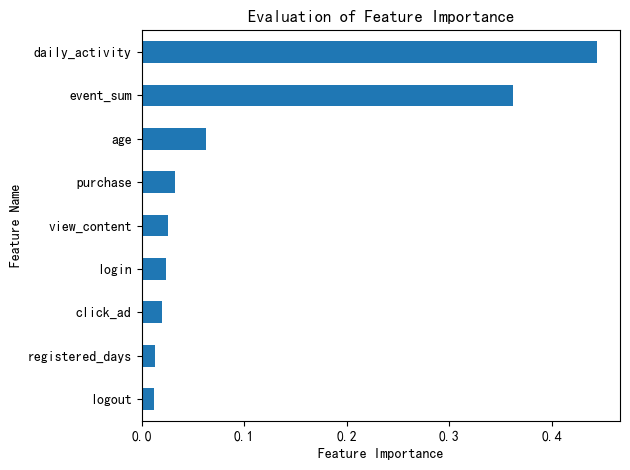

In [77]:
feat_importance.head(9).plot.barh()
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title(f"Evaluation of Feature Importance")
plt.legend().remove()
plt.tight_layout()
#模型过度依赖注册天数这一指标，可能是因为注册天数越长总活动数越多，这对于注册时间不长的用户来说是不公平的
#这并不能很好地反映用户每段时间内的活跃性，需要重构特征

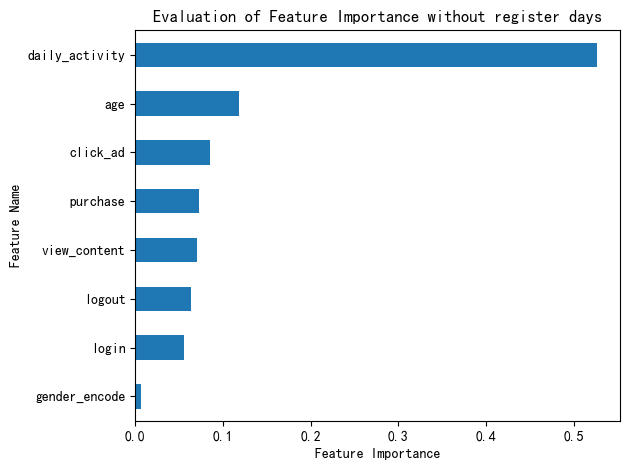

In [78]:
feat_importance_nodays_df.head(9).plot.barh()
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title(f"Evaluation of Feature Importance without register days")
plt.legend().remove()
plt.tight_layout()

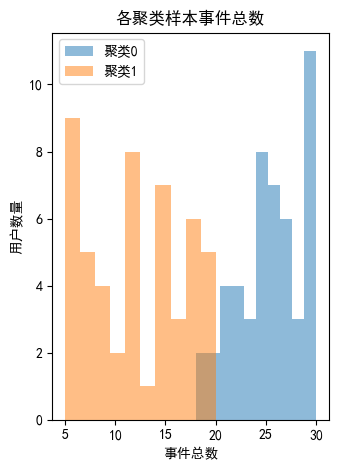

In [79]:
plt.subplot(1, 2, 1)
for label in [0, 1]:
    data = numerical_df[numerical_df['y_pred'] == label]['event_sum']
    plt.hist(data, alpha=0.5, label=f'聚类{label}')
plt.xlabel('事件总数')
plt.ylabel('用户数量')
plt.legend()
plt.title('各聚类样本事件总数')
plt.tight_layout()
plt.show()

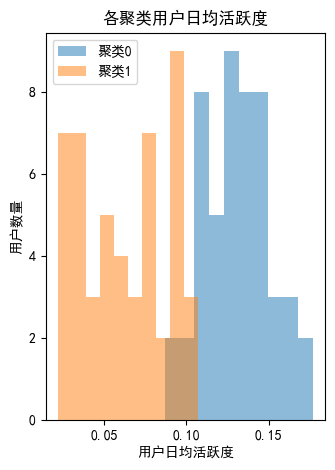

In [80]:
#显然，软标签具有一定指导性，聚类0代表的是相对活跃的用户
plt.subplot(1, 2, 1)
for label in [0, 1]:
    data = numerical_df_nodays[numerical_df_nodays['y_pred'] == label]['daily_activity']
    plt.hist(data, alpha=0.5, label=f'聚类{label}')
plt.xlabel('用户日均活跃度')
plt.ylabel('用户数量')
plt.legend()
plt.title('各聚类用户日均活跃度')
plt.tight_layout()
plt.show()

In [ ]:
plt.subplot(1, 2, 1)
for label in [0, 1]:
    data = numerical_df_nodays[numerical_df_nodays['y_pred'] == label]['daily_activity']
    plt.hist(data, alpha=0.5, label=f'聚类{label}')
plt.xlabel('用户日均活跃度')
plt.ylabel('用户数量')
plt.legend()
plt.title('各聚类用户日均活跃度')
plt.tight_layout()
plt.show()